In [2]:
#Nilesh Pandey
#8842221

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np

In [4]:
#Importing dataset
df_NP = pd.read_csv("D:/eConestoga Portal - BDSA/Programming of Big Data - Jomis/Assignments/10 - Individual - 5%/Loan.csv")

# Task 2 Data Exploration with Python

In [5]:
# Displaying head of the data
df_NP.head()

,Loan_Number,Gender,Maritial_Status,Dependency,Education,Employed,Income,Coapplicant,Loan,Term,Credit_History,Area,Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Summary of dataset
df_NP.describe()

,Income,Coapplicant,Loan,Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Checking missing values and datatypes
print(df_NP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_Number      614 non-null    object 
 1   Gender           601 non-null    object 
 2   Maritial_Status  611 non-null    object 
 3   Dependency       599 non-null    object 
 4   Education        614 non-null    object 
 5   Employed         582 non-null    object 
 6   Income           614 non-null    int64  
 7   Coapplicant      614 non-null    float64
 8   Loan             592 non-null    float64
 9   Term             600 non-null    float64
 10  Credit_History   564 non-null    float64
 11  Area             614 non-null    object 
 12  Status           614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [8]:
#Searching missing values
df_NP.isnull().sum()

Loan_Number         0
Gender             13
Maritial_Status     3
Dependency         15
Education           0
Employed           32
Income              0
Coapplicant         0
Loan               22
Term               14
Credit_History     50
Area                0
Status              0
dtype: int64

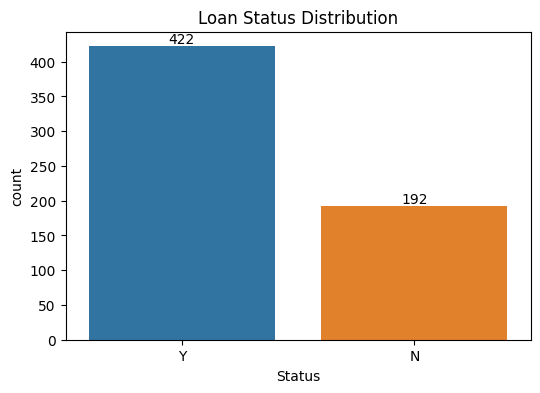

In [9]:
#Identifying loan status - Approved Y and Not Approved N
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Status", data=df_NP)

approved_count = df_NP[df_NP['Status'] == 'Y'].shape[0]
not_approved_count = df_NP[df_NP['Status'] == 'N'].shape[0]

# Annotate the approved and not-approved counts on top of each bar
ax.annotate(f'{approved_count}', xy=(0, approved_count), ha='center', va='bottom')
ax.annotate(f'{not_approved_count}', xy=(1, not_approved_count), ha='center', va='bottom')

plt.title("Loan Status Distribution")
plt.show()


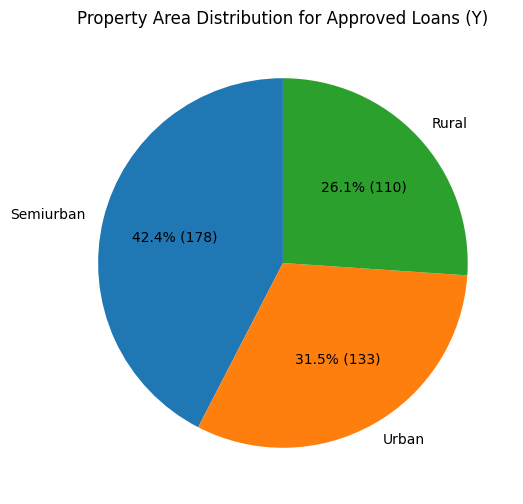

In [10]:
#Loan Approval - Area Distribution
import matplotlib.pyplot as plt
import seaborn as sns

approved_df = df_NP[df_NP['Status'] == 'Y']

# Calculating count
property_area_counts = approved_df['Area'].value_counts()
total_approved_loans = approved_df.shape[0]
property_area_percentages = (property_area_counts / total_approved_loans) * 100

# Plotting Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * total_approved_loans / 100)})', startangle=90)
plt.title("Property Area Distribution for Approved Loans (Y)")

plt.show()


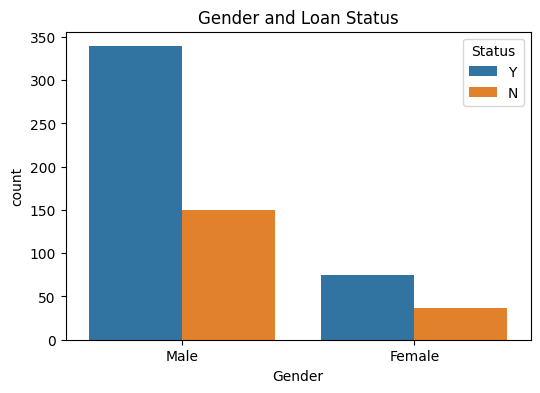

In [79]:
#Finding Loan Status - Gender Wise 
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Status", data=df_NP)
plt.title("Gender and Loan Status")
plt.show()

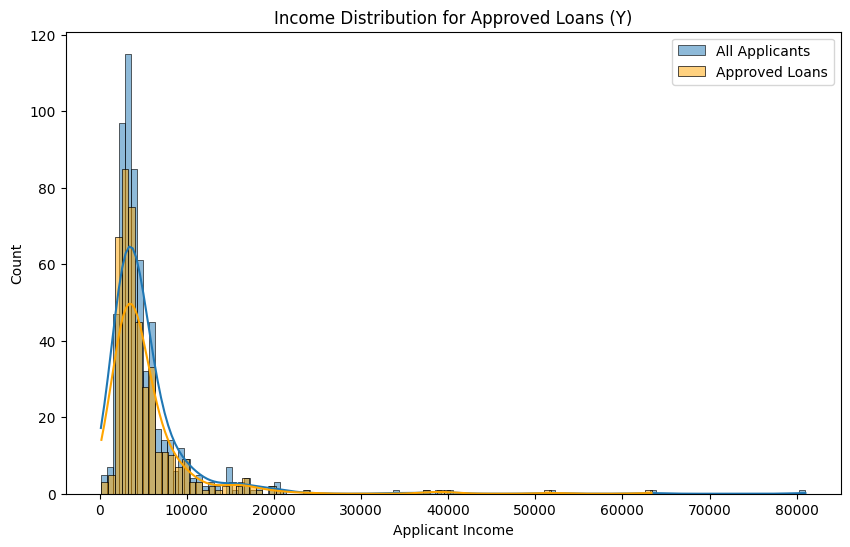

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the DataFrame - include rows with 'Status' == 'Y'
approved_df = df_NP[df_NP['Status'] == 'Y']

# Creating figures and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting histogram Income
sns.histplot(df_NP['Income'], kde=True, ax=ax, label='All Applicants')

# Plotting histogram Income -  approved loans ('Y')
sns.histplot(approved_df['Income'], kde=True, ax=ax, color='orange', label='Approved Loans')

# Setting Labels and Titles
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Income Distribution for Approved Loans (Y)')

# Adding Legends
plt.legend()

# Display the plot
plt.show()


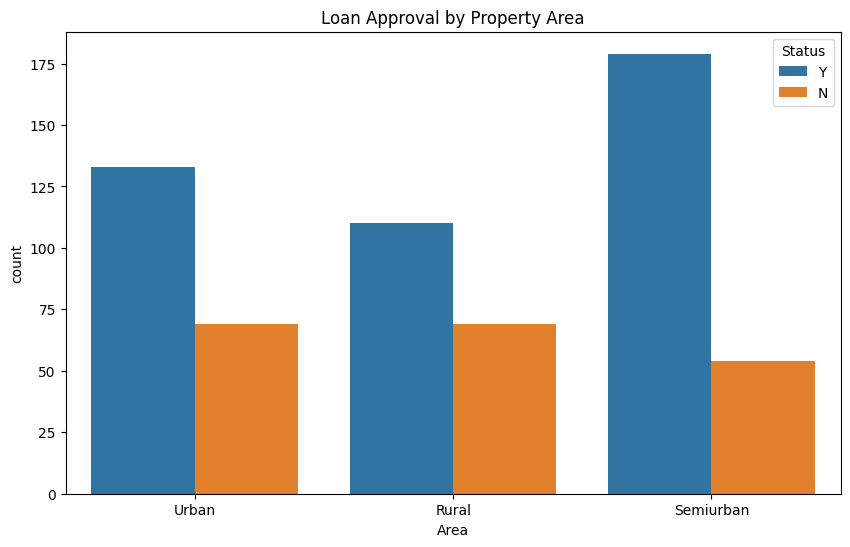

In [81]:
# Loan Approval by Area
plt.figure(figsize=(10, 6))
sns.countplot(x="Area", hue="Status", data=df_NP)
plt.title("Loan Approval by Property Area")
plt.show()



### Task 3 Data Preprocessing with Python

In [82]:
df_NP['Dependency'] = pd.to_numeric(df_NP['Dependency'], errors='coerce')

# Convert 'Loan' and 'Term' columns to numeric
df_NP['Loan'] = pd.to_numeric(df_NP['Loan'], errors='coerce')
df_NP['Term'] = pd.to_numeric(df_NP['Term'], errors='coerce')

# Handling missing values
mean_loan_amount = df_NP['Loan'].mean()
mean_loan_term = df_NP['Term'].mean()

df_NP['Loan'].fillna(mean_loan_amount, inplace=True)
df_NP['Term'].fillna(mean_loan_term, inplace=True)

df_NP = pd.get_dummies(df_NP, columns=['Gender', 'Maritial_Status', 'Education', 'Employed', 'Area'], drop_first=True)

df_NP['Status'] = df_NP['Status'].map({'Y': 1, 'N': 0})

In [83]:
#checking if the data types to see changes 
df_NP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_Number             614 non-null    object 
 1   Dependency              548 non-null    float64
 2   Income                  614 non-null    int64  
 3   Coapplicant             614 non-null    float64
 4   Loan                    614 non-null    float64
 5   Term                    614 non-null    float64
 6   Credit_History          564 non-null    float64
 7   Status                  614 non-null    int64  
 8   Gender_Male             614 non-null    bool   
 9   Maritial_Status_Yes     614 non-null    bool   
 10  Education_Not Graduate  614 non-null    bool   
 11  Employed_Yes            614 non-null    bool   
 12  Area_Semiurban          614 non-null    bool   
 13  Area_Urban              614 non-null    bool   
dtypes: bool(6), float64(5), int64(2), object(1

In [84]:
#from the above code we found that column Dependency and Credit_History contains missing values
df_NP['Dependency'].fillna(df_NP['Dependency'].mode()[0], inplace=True)
df_NP['Credit_History'].fillna(df_NP['Credit_History'].mode()[0], inplace=True)

# Printing the updated count
print(df_NP.isnull().sum())


Loan_Number               0
Dependency                0
Income                    0
Coapplicant               0
Loan                      0
Term                      0
Credit_History            0
Status                    0
Gender_Male               0
Maritial_Status_Yes       0
Education_Not Graduate    0
Employed_Yes              0
Area_Semiurban            0
Area_Urban                0
dtype: int64


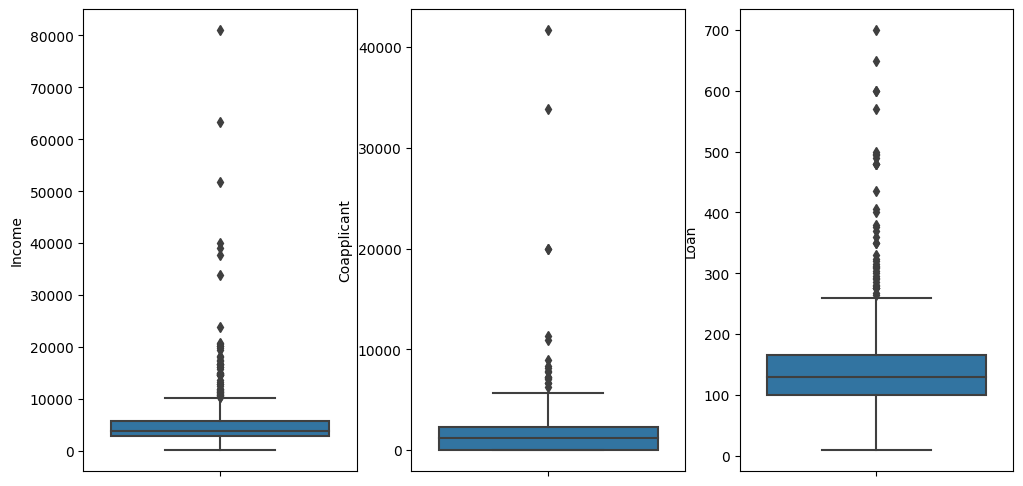

In [85]:
#checking for outliers by box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='Income', data=df_NP)
plt.subplot(1, 3, 2)
sns.boxplot(y='Coapplicant', data=df_NP)
plt.subplot(1, 3, 3)
sns.boxplot(y='Loan', data=df_NP)
plt.show()

In [86]:
def handle_outliers_iqr(df_NP, column):
    Q1 = df_NP[column].quantile(0.25)
    Q3 = df_NP[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_NP.loc[df_NP[column] < lower_bound, column] = lower_bound
    df_NP.loc[df_NP[column] > upper_bound, column] = upper_bound

# Applying IQR method to 'Income' column
handle_outliers_iqr(df_NP, 'Income')
handle_outliers_iqr(df_NP, 'Coapplicant')
handle_outliers_iqr(df_NP, 'Loan')

### Task 4:  Implement Machine Learning Models with Python 

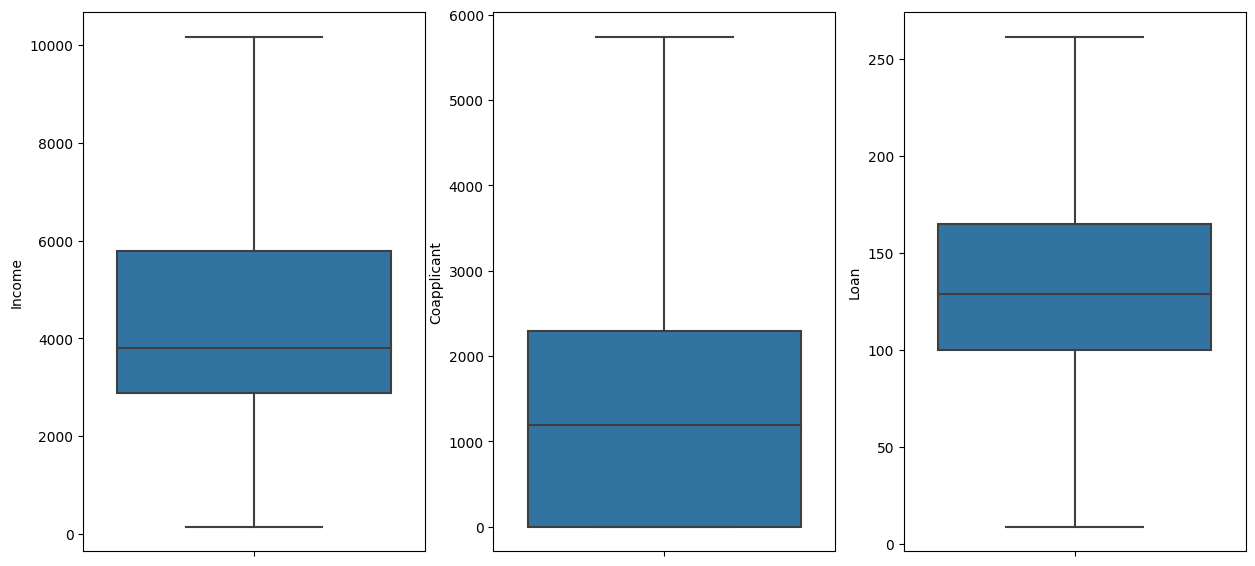

In [87]:
#check for outliers after processing outliers
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
sns.boxplot(y='Income', data=df_NP)
plt.subplot(1, 3, 2)
sns.boxplot(y='Coapplicant', data=df_NP)
plt.subplot(1, 3, 3)
sns.boxplot(y='Loan', data=df_NP)
plt.show()

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate the target variable (Status) from the features
X = df_NP.drop(columns=['Loan_Number', 'Status','Gender_Male'])
y = df_NP['Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Accuracy:", accuracy_logistic)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix_logistic)
print("Classification Report (Logistic Regression):")
print(classification_report_logistic)


random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)


y_pred_rf = random_forest_model.predict(X_test_scaled)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Model Accuracy:", accuracy_rf)
print("Confusion Matrix (Random Forest Classifier):")
print(confusion_matrix_rf)
print("Classification Report (Random Forest Classifier):")
print(classification_report_rf)


Logistic Regression Model Accuracy: 0.7886178861788617
Confusion Matrix (Logistic Regression):
[[18 25]
 [ 1 79]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest Classifier Model Accuracy: 0.7723577235772358
Confusion Matrix (Random Forest Classifier):
[[19 24]
 [ 4 76]]
Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



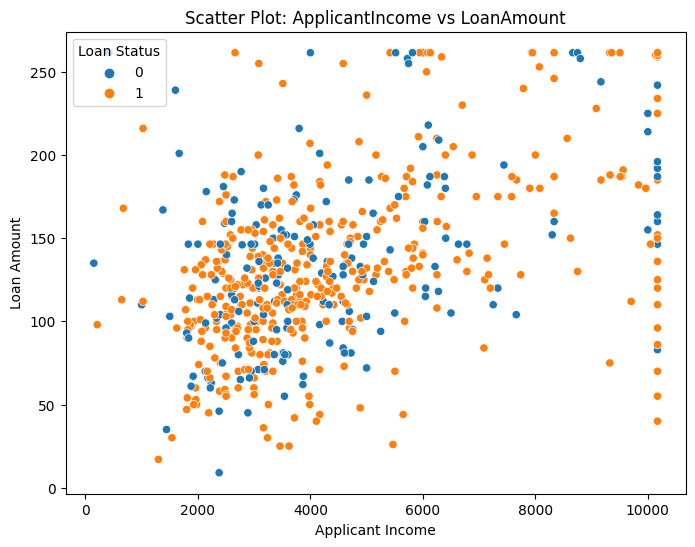

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_NP, x='Income', y='Loan', hue='Status')
plt.title('Scatter Plot: ApplicantIncome vs LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

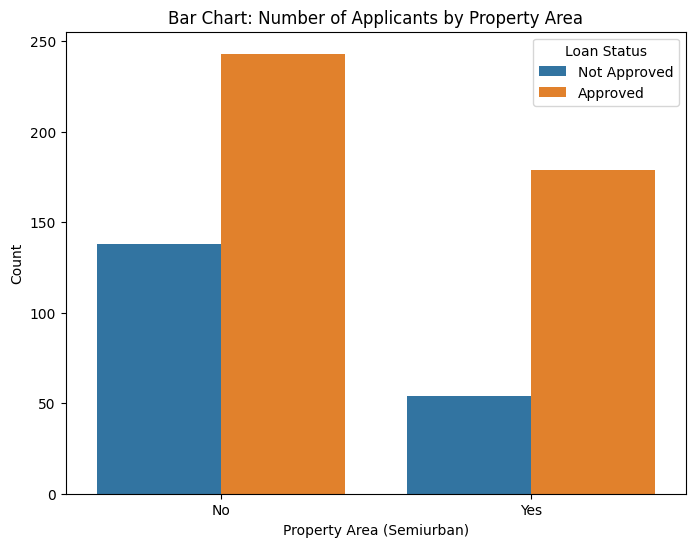

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_NP, x='Area_Semiurban', hue='Status')
plt.title('Bar Chart: Number of Applicants by Property Area')
plt.xlabel('Property Area (Semiurban)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

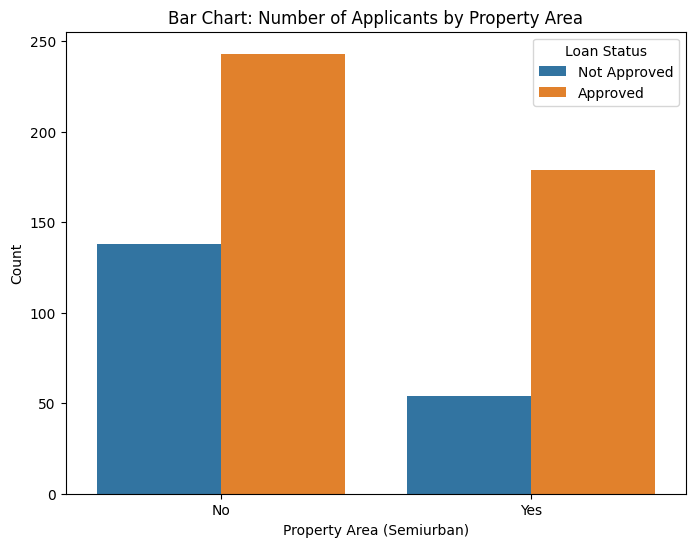

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_NP, x='Area_Semiurban', hue='Status')
plt.title('Bar Chart: Number of Applicants by Property Area')
plt.xlabel('Property Area (Semiurban)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()